In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


# **AGENDA**:
* DATA EXPLORATION

* HANDLING MISSING DATA

* VISUALIZATION

* HANDLING OUTLIER

* ONE-HOT ENCODER

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Import Data: 
df= pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1. DATA EXPLORATION 

In [4]:
# data shape:
df.shape

(14999, 10)

In [5]:
#data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#Statistical analysis for nummerical data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [7]:
#Statistical analysic for categorical data:
df.describe(exclude=['float','int64']).T

,count,unique,top,freq
Department,14999,10,sales,4140
salary,14999,3,low,7316


# 2. HANDLING MISSING VALUES

In [8]:
# Missing data:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## There is no NAN value in the data set, so we can skip the dropping Null data process

# 3. VISUALIZATION

I want to investigate to the reason why people left the company.

I use countplot function to figure it out: 

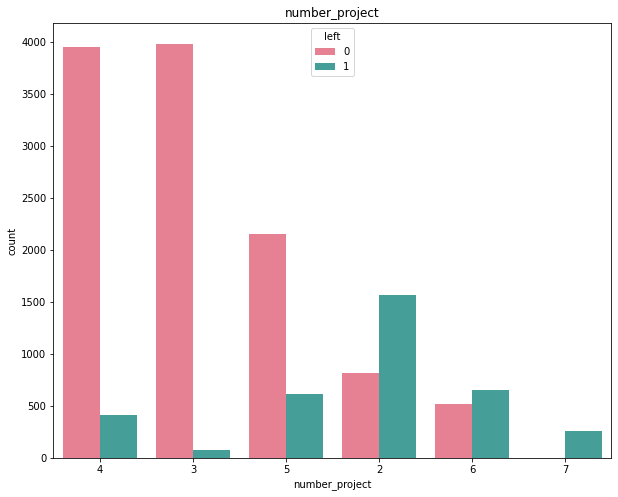

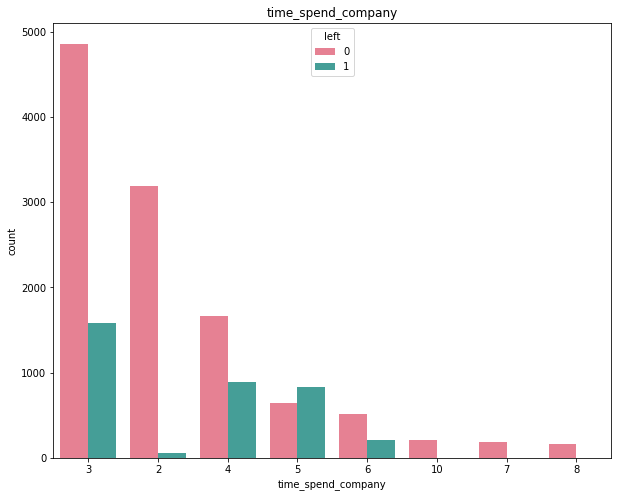

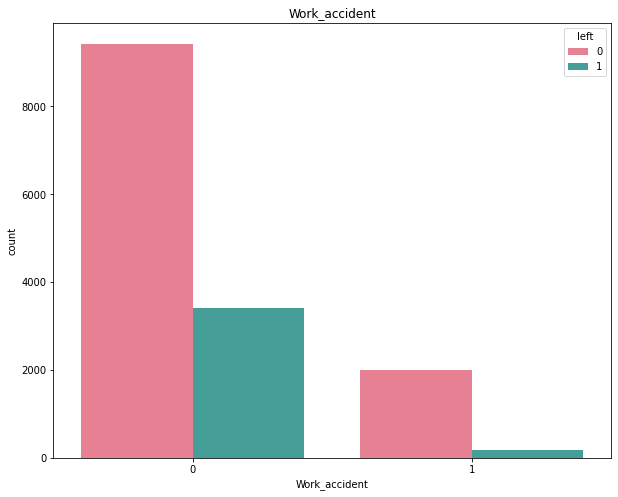

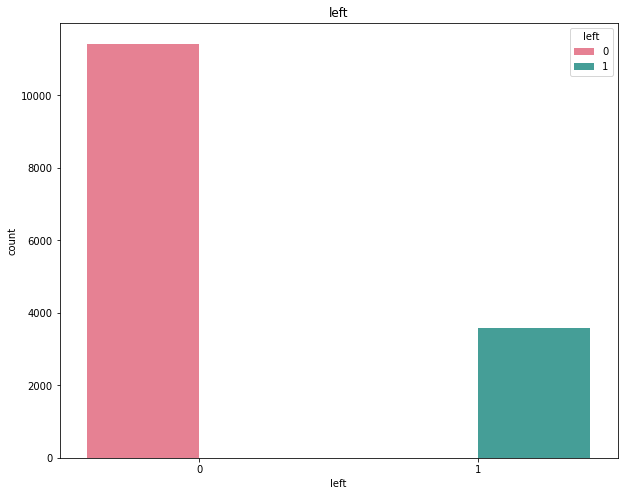

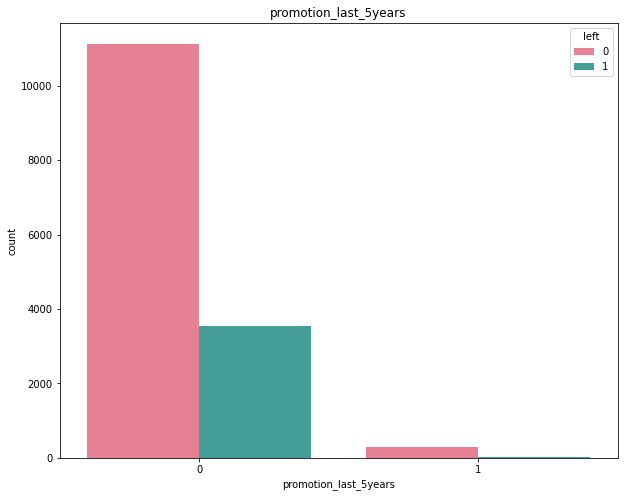

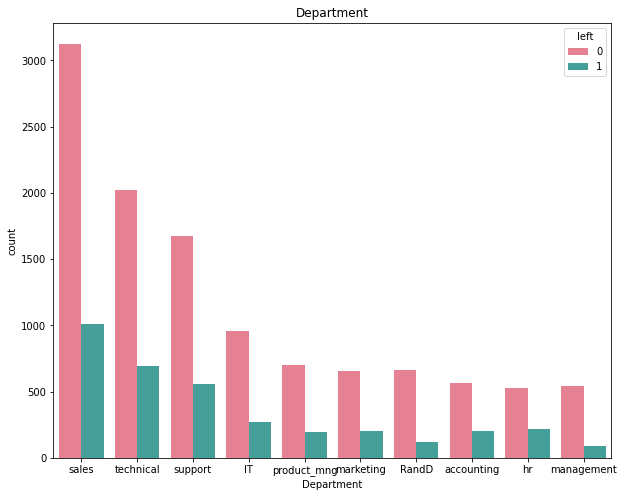

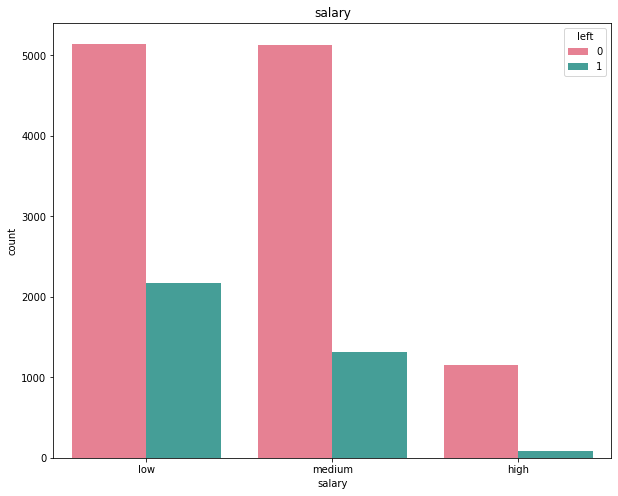

In [9]:
#COUNT PLOT
df_cat=df.drop(['satisfaction_level','last_evaluation','average_montly_hours'],axis=1)
for i in df_cat.columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data= df_cat, 
                  x= i,
                  hue='left',
                  palette='husl',
                  order = df_cat[i].value_counts().index)
    plt.title(i)
    plt.show()

Here are some primary factors that makes people left the company: Since there is no data description in the origin data. For the "Left" feature, I intuitively  set the value 0 for whom still stays with the company and set the value 1 for whom left the company 

* First Plot: Number of the project: Employee tends to leave the company when he feel not to be practiced in a lot of company's project (2projects)

* Second Plot: Time_spend_company: There is a trend that employee will leave the company at the year number 3. If he still stays at the company until the year no.7, he tends to stay with the company more longer.

* Third Plot: Work-accident: if there is no work-related accident during his career at the company, he may prefer to switch the job in the future. 

* Fifth: Promition in past 5 year: when the employee didn't be promoted for the last five year, there is a tendency he may leave the company 

* Sixth: Department: People working in Sale, Technical and Support show less commitment on the stay. Contrastly, R&D, HR and Management people seems to stay longer with the company

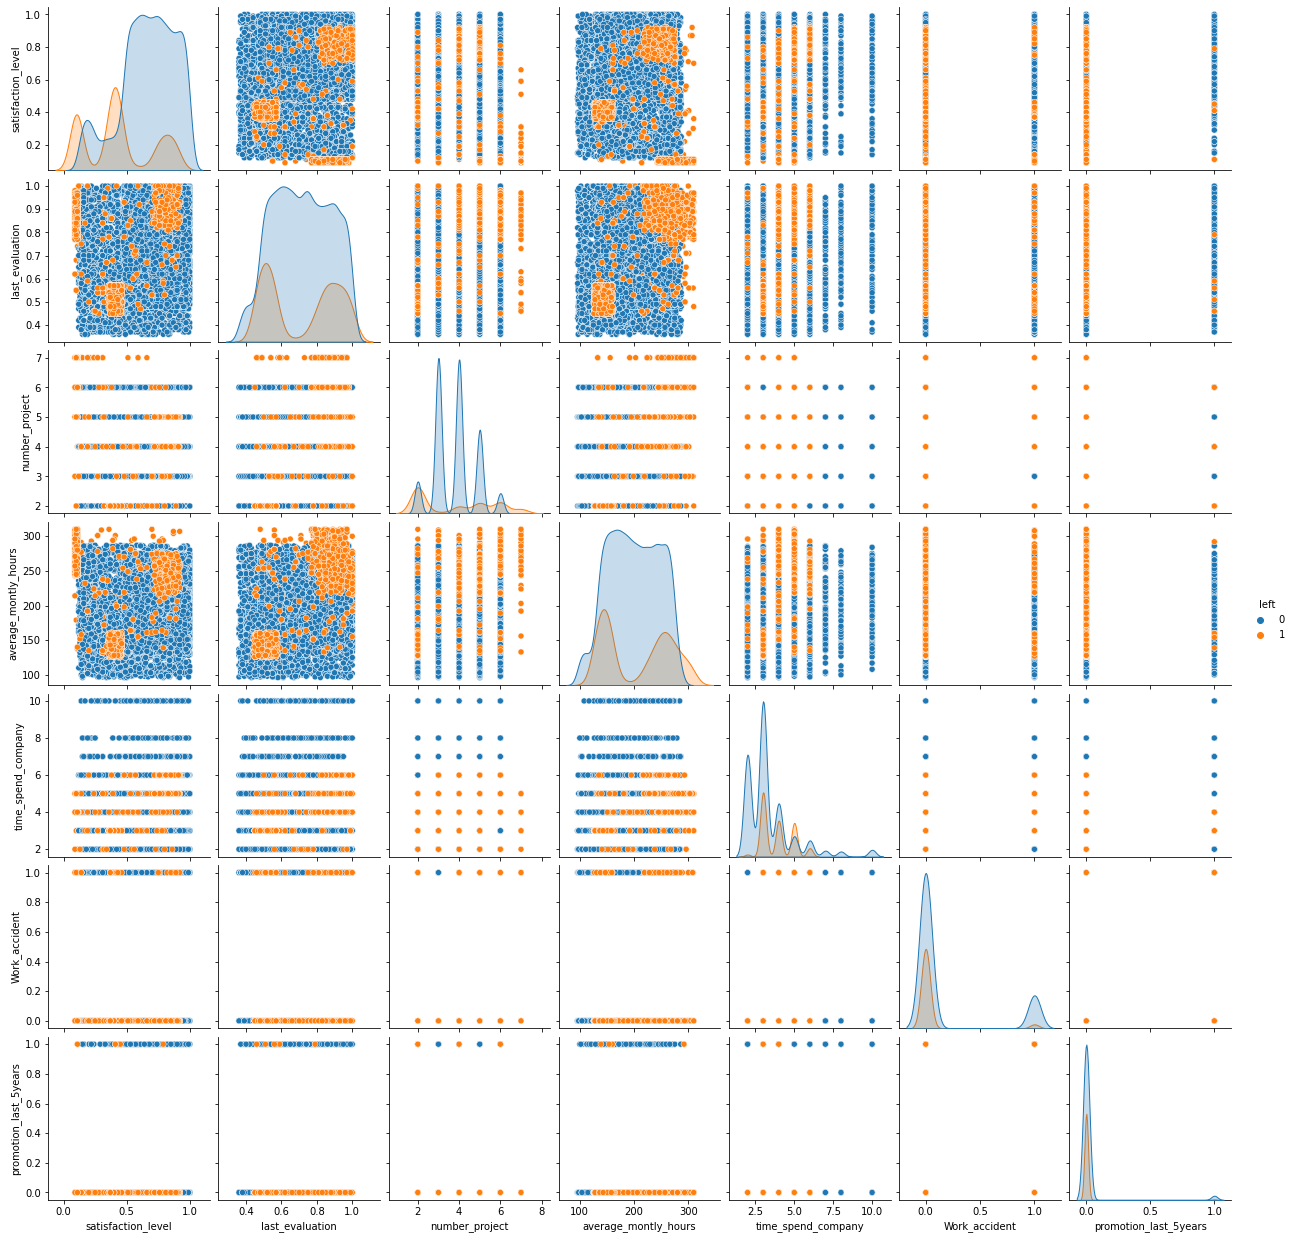

In [10]:
#plot the pairplot:
sns.pairplot(df,hue='left')

I want to focus a little bit  on the numerical data, I plot the corellation map to see the trend here

<AxesSubplot:>

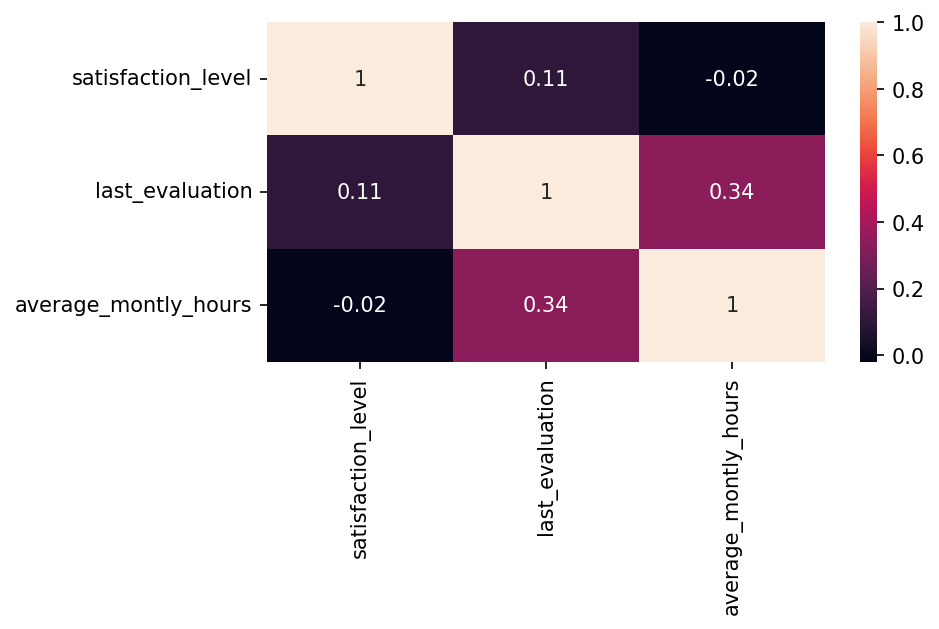

In [11]:
# HEAT MAP TO DISPLAY CORRLATION 
df2=df.drop(columns= df_cat.columns,axis=1)
plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(df2.corr(), annot=True)

Some ideas I can bring by looking the correlation table are:

* longer mothly working hours, less satisfaction level

* Satisfaction level and last evalution are relatively correlated

* Average_ monthly working hour and the last evaluation are relatively correlated

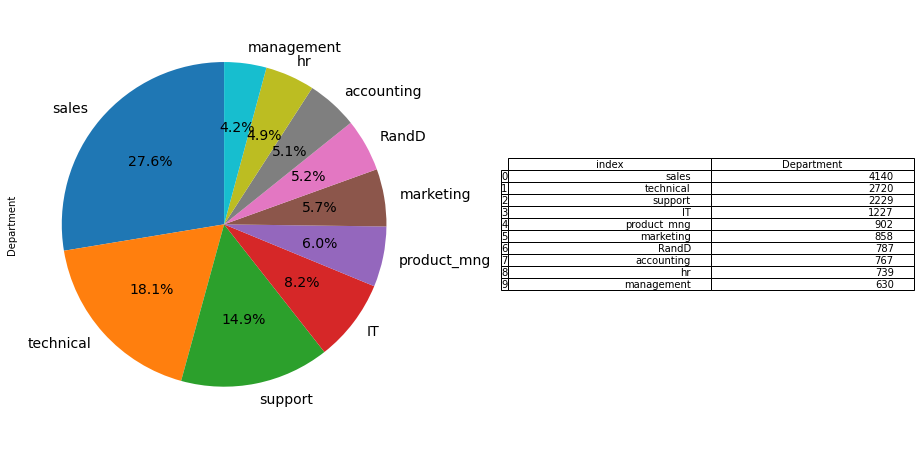

In [12]:
#separate the category of Department Feature:
Department= df['Department'].value_counts().reset_index()
cat1 =Department['index'].to_numpy()
# plot pie
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
Department.plot(kind='pie',
                y = 'Department',
                ax=ax1,
                autopct='%1.1f%%', 
                startangle=90, 
                shadow=False, 
                labels=cat1, 
                legend = False, 
                fontsize=14)
# plot table
from pandas.plotting import table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, Department, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.show()

From the pie plot and table above, we can tell Sale department having the most employee of the company. Follow by Technical and Support department. 

The department has the fewest jobs is Management department. 

In [13]:
#separate the category of Department Feature:
salary = df['salary'].value_counts().reset_index()
cat2 =salary['index'].to_numpy()
cat2

array(['low', 'medium', 'high'], dtype=object)

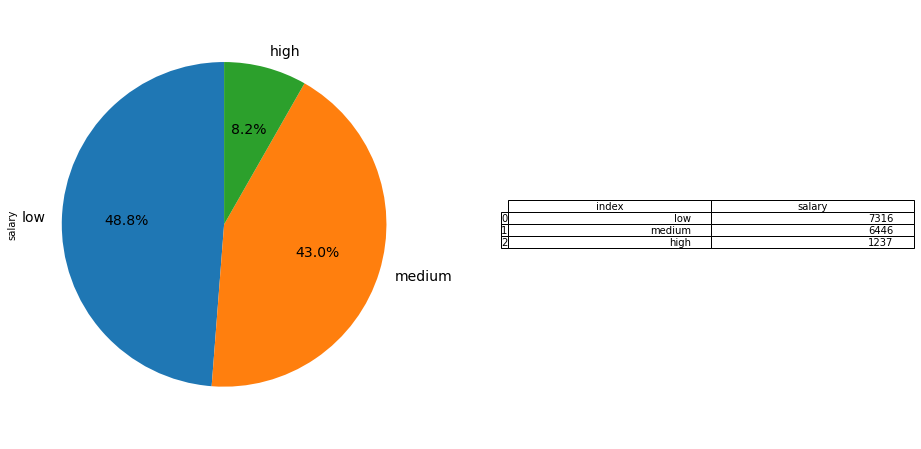

In [14]:

# plot pie
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
salary.plot(kind='pie',
                y = 'salary',
                ax=ax1,
                autopct='%1.1f%%', 
                startangle=90, 
                shadow=False, 
                labels=cat2, 
                legend = False, 
                fontsize=14)
# plot table
from pandas.plotting import table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, salary, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.show()

Most of the employees in the company receive low salary( 48.8%) while only 8.2% of the staff receive high salary 

Alternatively, we can use the barplot( instead of the count plot) to visualize the data and investigate the reason why employees leave the company. 

I display the barplot below:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


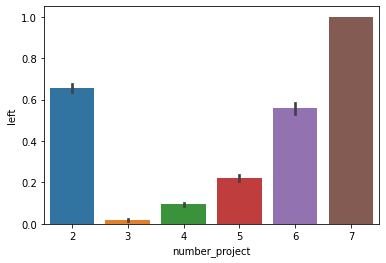

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


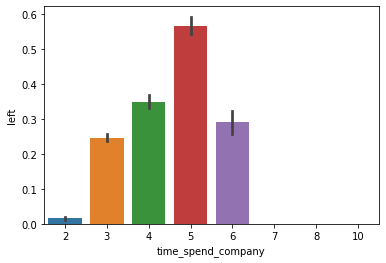

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


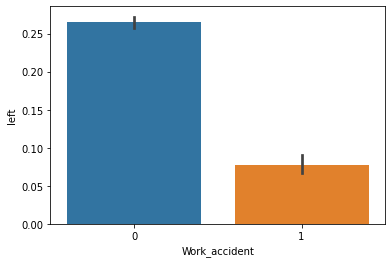

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


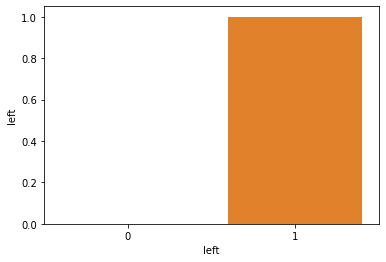

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


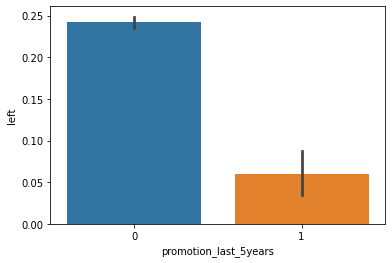

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


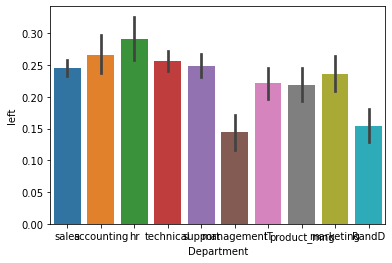

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


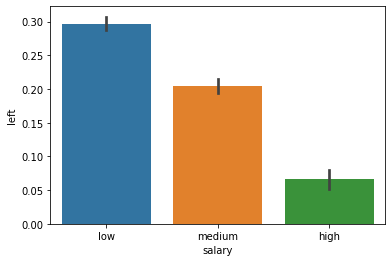

In [15]:
for i in df_cat.columns:
    sns.barplot(df_cat[i],df['left'])
    plt.show()

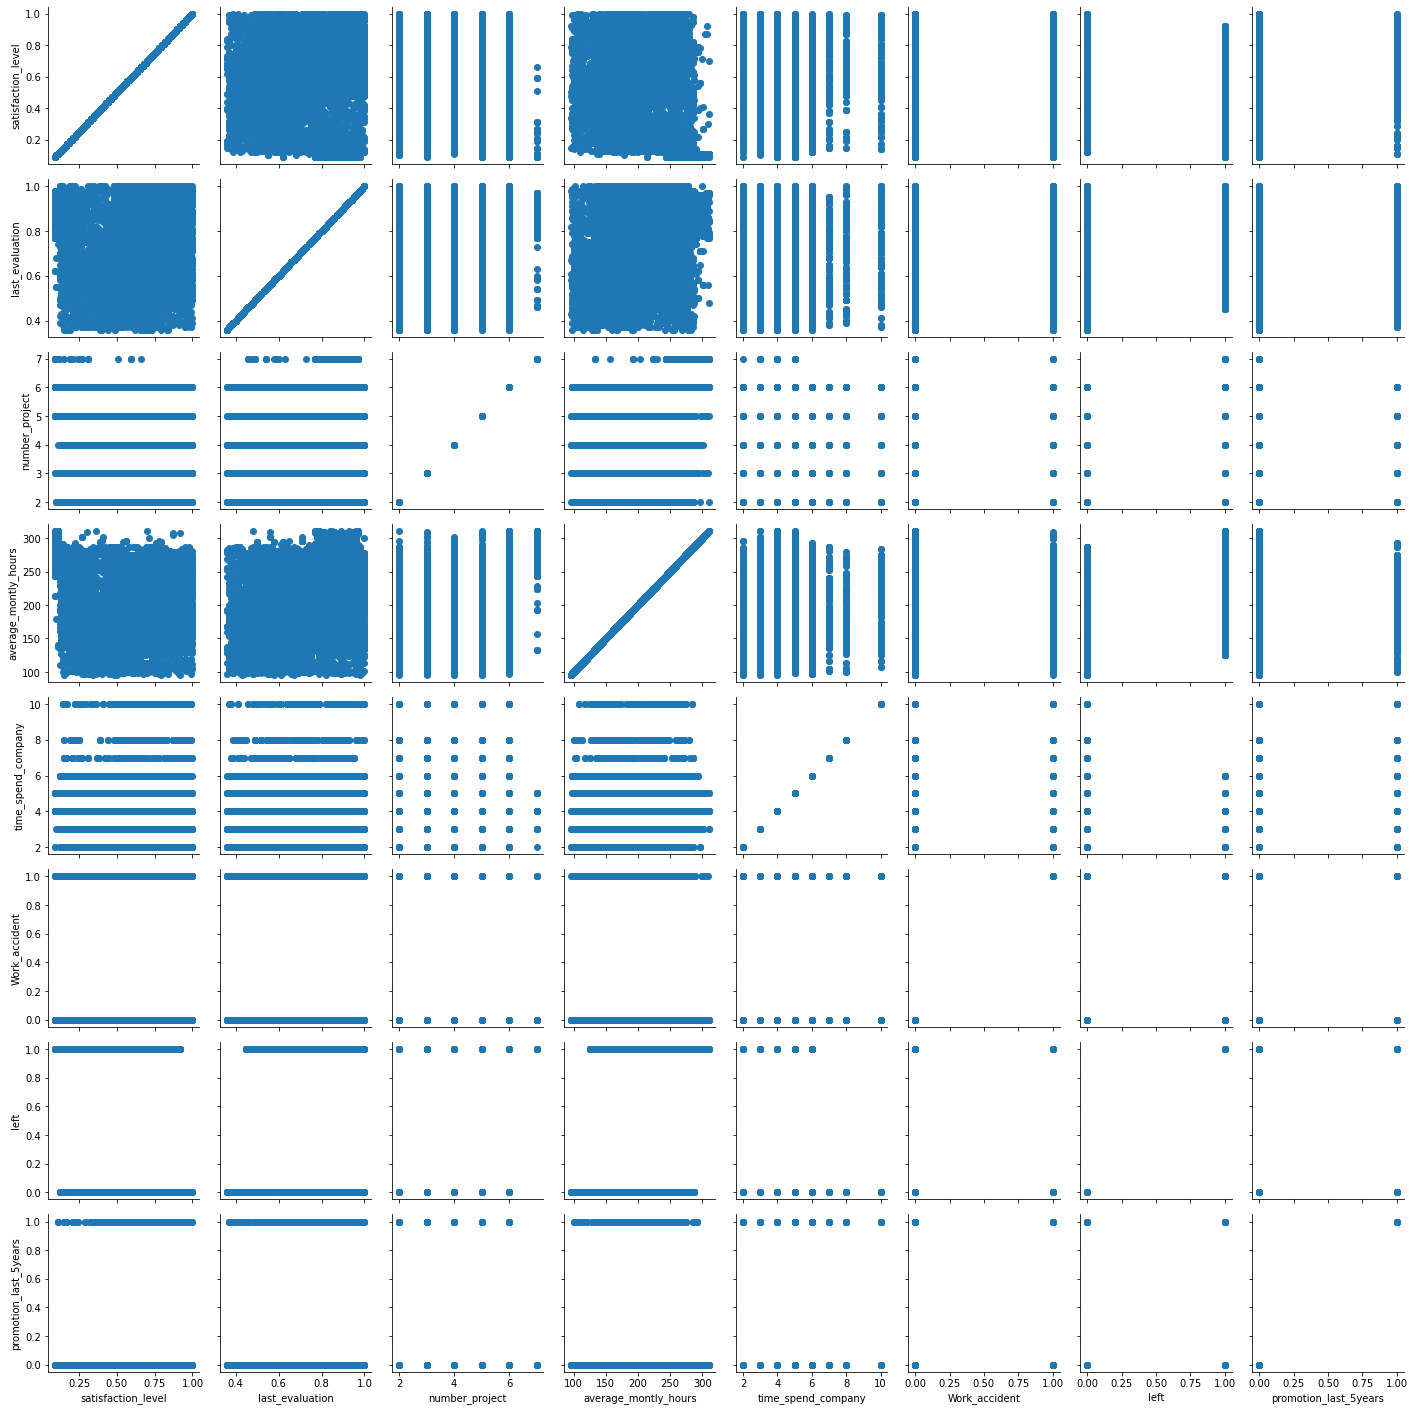

In [16]:
grid= sns.PairGrid(df)
grid.map(plt.scatter)

# 4. HANDLING OUTLIER VALUE:

I will visualize the set of plot to figure whether the data sample contains outlier

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


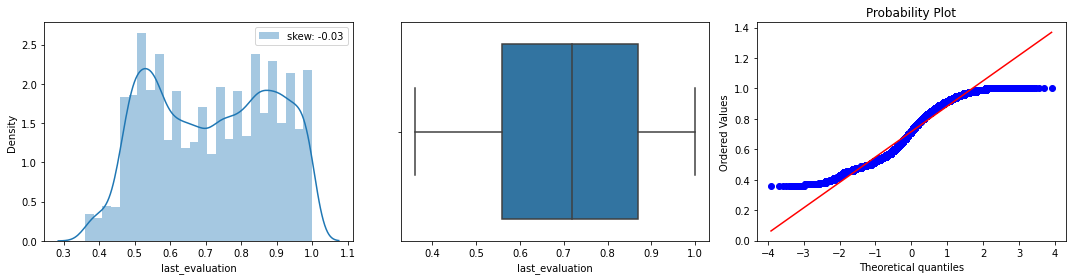

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


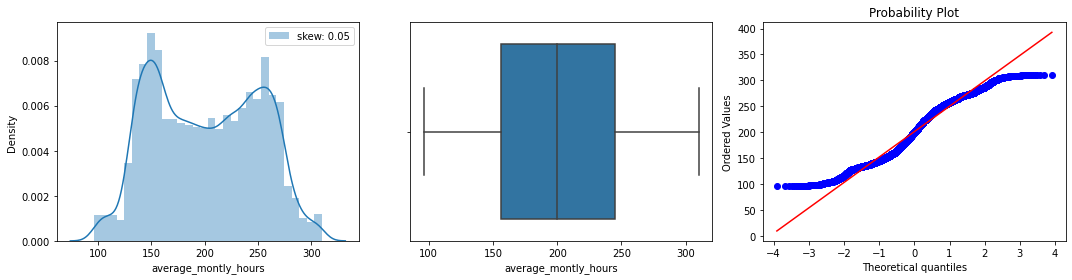

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


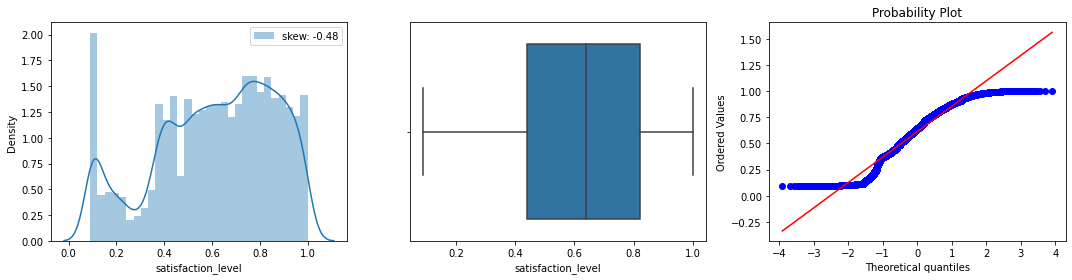

In [17]:
num= ['last_evaluation','average_montly_hours','satisfaction_level']
from scipy import stats
for col in num:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

* Histogram: I could tell average_monthly_hours shape is bimodal (double-peaked). Look at the 3 histograms we could tell visually, there are no outlier.

* Boxplot: the boxplots show there are no outlier 

* Q-Q plot: the data values of average_monthly_hours tend to closely follow the 45 degree, which means the data is likely normally distributed.

Conclusion: No outlier

# 5. ONE-HOT ENCONDING

A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [18]:
one_hot1= pd.get_dummies(df['Department'])
one_hot2=pd.get_dummies(df['salary'])
df_new=df.join(one_hot1)
df_new=df_new.join(one_hot2)
df_new.drop(columns=['Department','salary'],inplace=True)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
df_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical', 'high', 'low', 'medium'],
      dtype='object')